# Notebook for sktime Analysis

## Importing the necessary modules

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pmdarima
from sktime.utils.plotting import plot_series
from sktime.forecasting.naive import NaiveForecaster
from sktime.registry import all_estimators
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.var import VAR
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.split import ExpandingWindowSplitter

## Loading the preprocessed data

In [2]:
df = pd.read_csv("..\..\Data\weatherAUS_Agglomeration.csv")

## Univariate Forecaster

C:\Users\Maximilian Holdt\AppData\Local\Temp\ipykernel_7916\2983242212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_cluster['year_month'] = pd.to_datetime(rain_cluster['Date']).dt.strftime('%Y-%m')
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)


<Figure size 1000x600 with 0 Axes>

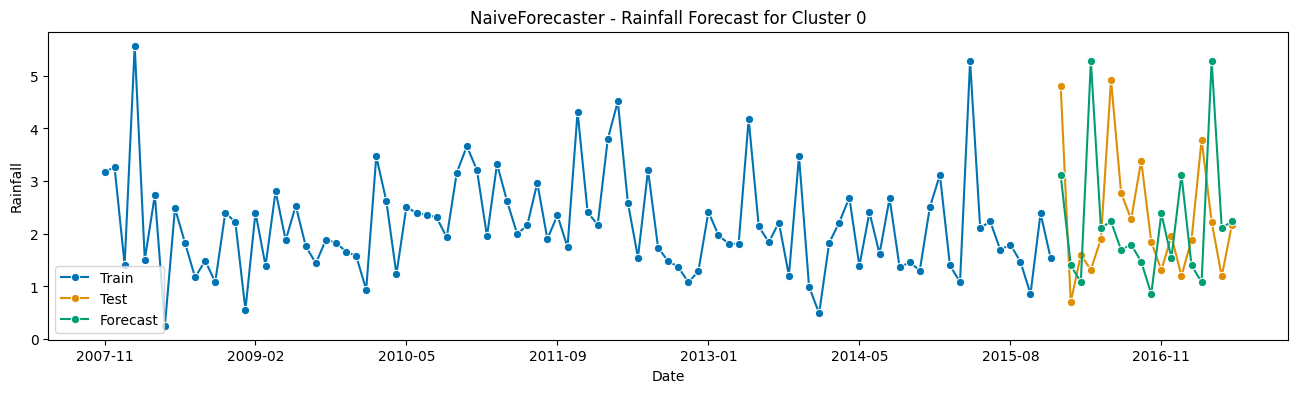

C:\Users\Maximilian Holdt\AppData\Local\Temp\ipykernel_7916\2983242212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_cluster['year_month'] = pd.to_datetime(rain_cluster['Date']).dt.strftime('%Y-%m')
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)


<Figure size 1000x600 with 0 Axes>

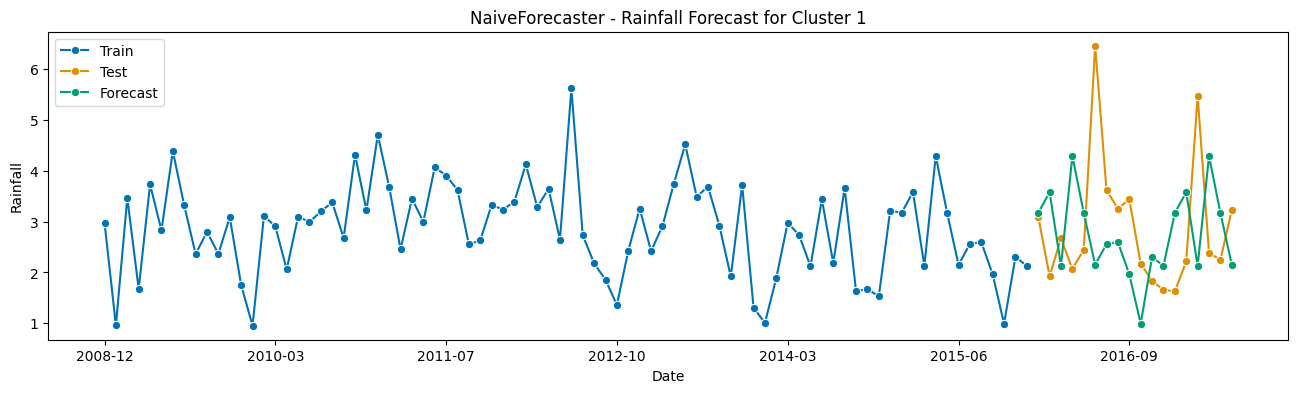

C:\Users\Maximilian Holdt\AppData\Local\Temp\ipykernel_7916\2983242212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_cluster['year_month'] = pd.to_datetime(rain_cluster['Date']).dt.strftime('%Y-%m')
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)


<Figure size 1000x600 with 0 Axes>

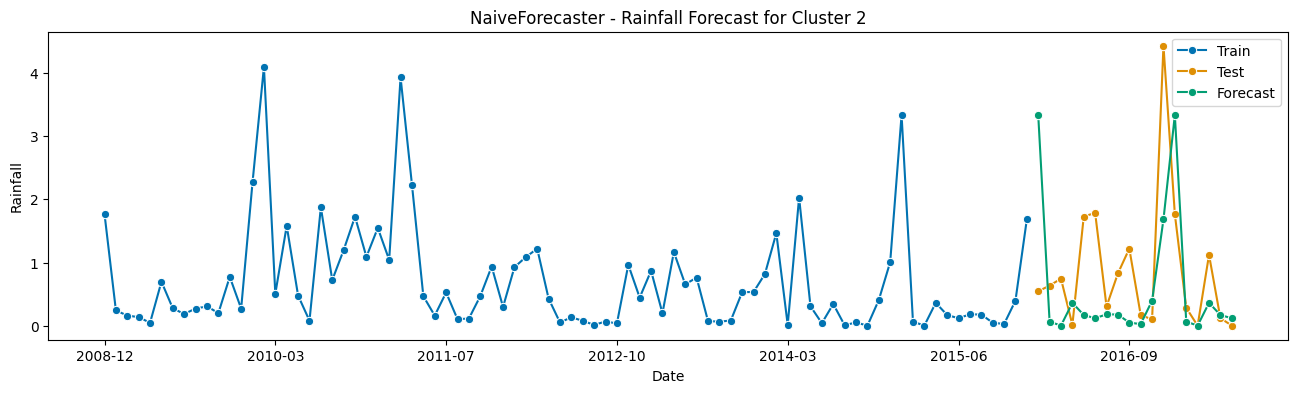

C:\Users\Maximilian Holdt\AppData\Local\Temp\ipykernel_7916\2983242212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_cluster['year_month'] = pd.to_datetime(rain_cluster['Date']).dt.strftime('%Y-%m')
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)


<Figure size 1000x600 with 0 Axes>

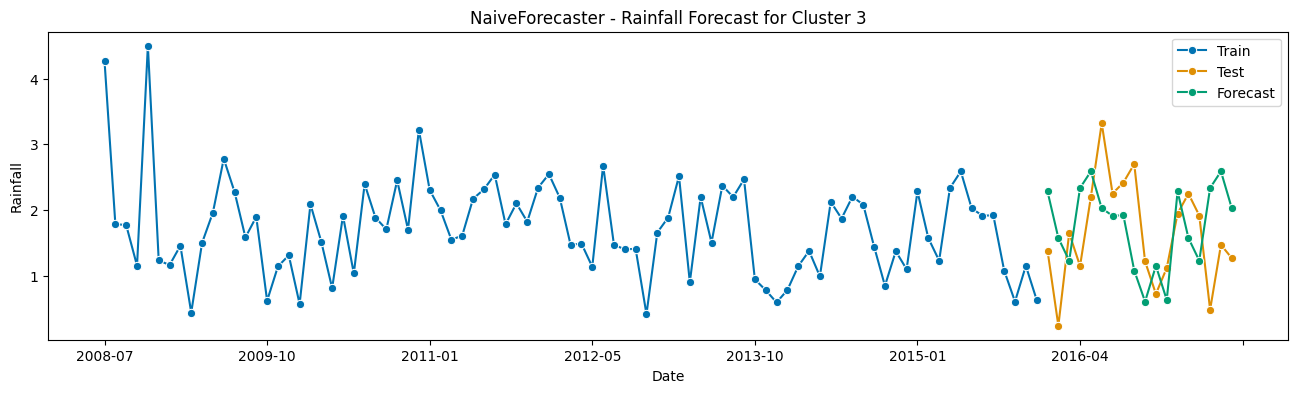

C:\Users\Maximilian Holdt\AppData\Local\Temp\ipykernel_7916\2983242212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain_cluster['year_month'] = pd.to_datetime(rain_cluster['Date']).dt.strftime('%Y-%m')
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)


<Figure size 1000x600 with 0 Axes>

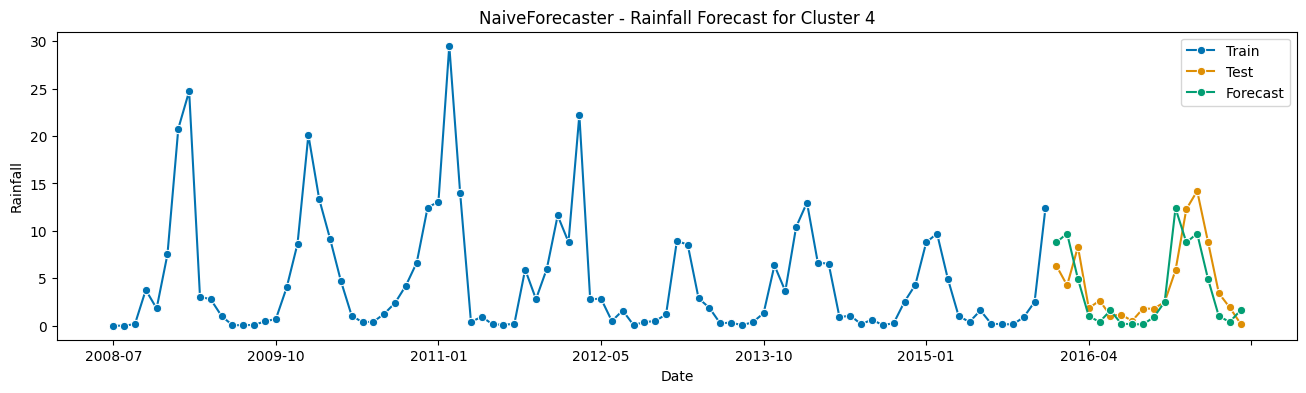

In [3]:
### Iterate over each cluster
for cluster in range(5):
    
    rain = df[['Cluster', 'Date', 'Rainfall']]
    
    rain_cluster = rain[rain['Cluster'] == cluster]
    
    rain_cluster['year_month'] = pd.to_datetime(rain_cluster['Date']).dt.strftime('%Y-%m')
    
    
    rain_cluster = rain_cluster.drop(['Cluster', 'Date'], axis=1)
    
    # Calculate mean for each year_month
    rain_cluster_mean = rain_cluster.groupby(['year_month'], as_index=True).mean()
    
    # Reset index
    rain_cluster_mean = rain_cluster_mean.reset_index()
    
    # Convert 'year_month' to PeriodIndex
    rain_cluster_mean['year_month'] = pd.PeriodIndex(rain_cluster_mean['year_month'], freq='M')
    rain_cluster_mean = rain_cluster_mean.set_index('year_month')
    
    rain_cluster_mean_train = rain_cluster_mean[rain_cluster_mean.index.year < 2016]
    rain_cluster_mean_test = rain_cluster_mean[rain_cluster_mean.index.year >= 2016]
    
    # Define forecast horizon
    fh = np.arange(1, 19)
    
    # Initialize and fit forecaster
    forecaster = NaiveForecaster(strategy="last", sp=12)
    forecaster.fit(rain_cluster_mean_train)
    
    rain_cluster_mean_pred = forecaster.predict(fh)
    
    # Plot series
    ##plot_series(rain_cluster_mean, rain_cluster_mean_pred, labels=[f"Cluster {cluster}_mean", f"Cluster {cluster}_pred"])
    plt.figure(figsize=(10, 6))
    plot_series(rain_cluster_mean_train, rain_cluster_mean_test, rain_cluster_mean_pred, labels=['Train', 'Test', 'Forecast'])
    plt.title(f"NaiveForecaster - Rainfall Forecast for Cluster {cluster}")
    plt.xlabel("Date")
    plt.ylabel("Rainfall")
    plt.legend()
    plt.show()

## Multivariate Forecaster

C:\Users\Maximilian Holdt\AppData\Local\Temp\ipykernel_7916\40035401.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("..\..\Data\weatherAUS_Max_final.csv", parse_dates=[0], index_col=[0])
C:\Users\Maximilian Holdt\AppData\Local\Temp\ipykernel_7916\40035401.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mult_cluster['year_month'] = pd.to_datetime(mult_cluster['Date']).dt.strftime('%Y-%m')
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, pleas

<Figure size 1000x600 with 0 Axes>

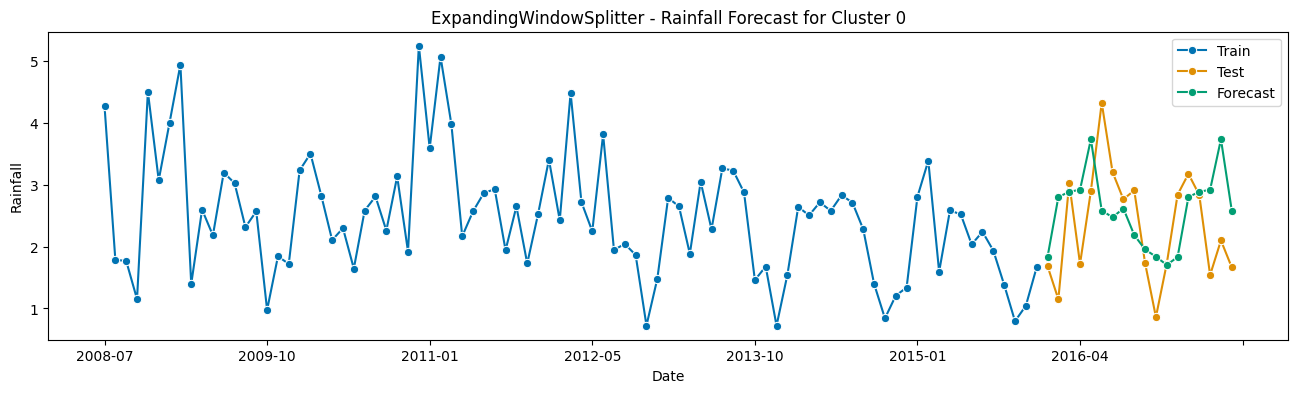

C:\Users\Maximilian Holdt\AppData\Local\Temp\ipykernel_7916\40035401.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mult_cluster['year_month'] = pd.to_datetime(mult_cluster['Date']).dt.strftime('%Y-%m')
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
c:\Users\Maximilian Holdt\AppData\Local\Programs\

<Figure size 1000x600 with 0 Axes>

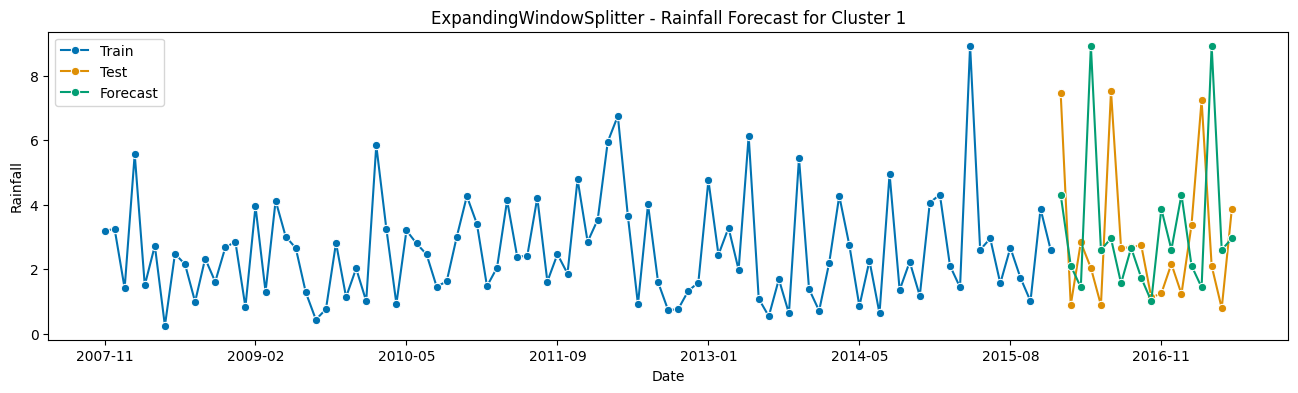

C:\Users\Maximilian Holdt\AppData\Local\Temp\ipykernel_7916\40035401.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mult_cluster['year_month'] = pd.to_datetime(mult_cluster['Date']).dt.strftime('%Y-%m')
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
c:\Users\Maximilian Holdt\AppData\Local\Programs\

<Figure size 1000x600 with 0 Axes>

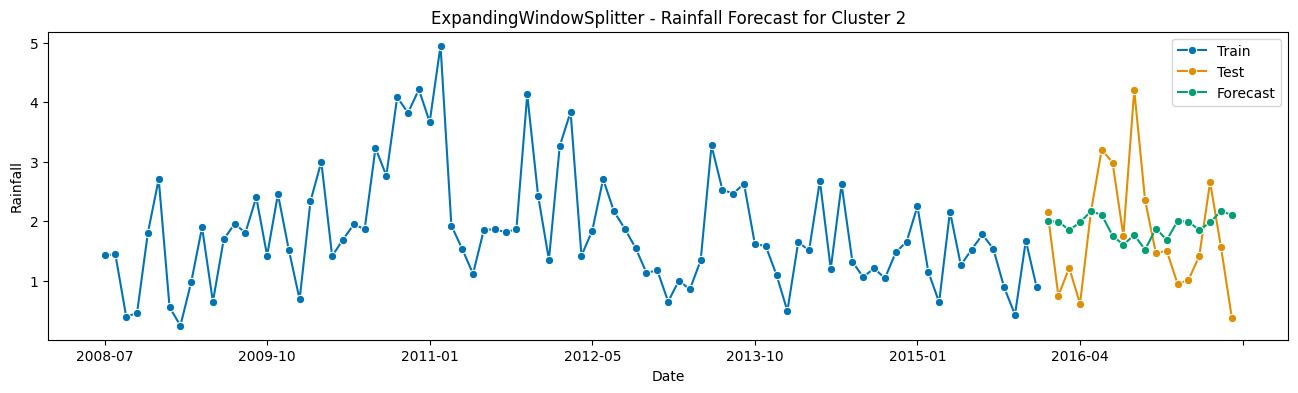

C:\Users\Maximilian Holdt\AppData\Local\Temp\ipykernel_7916\40035401.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mult_cluster['year_month'] = pd.to_datetime(mult_cluster['Date']).dt.strftime('%Y-%m')
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
c:\Users\Maximilian Holdt\AppData\Local\Programs\

<Figure size 1000x600 with 0 Axes>

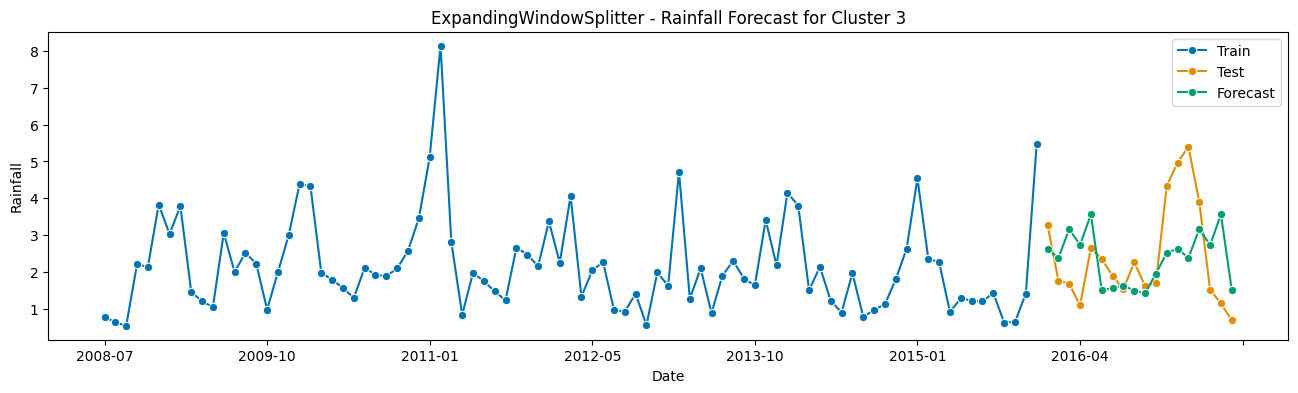

C:\Users\Maximilian Holdt\AppData\Local\Temp\ipykernel_7916\40035401.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mult_cluster['year_month'] = pd.to_datetime(mult_cluster['Date']).dt.strftime('%Y-%m')
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
c:\Users\Maximilian Holdt\AppData\Local\Programs\

<Figure size 1000x600 with 0 Axes>

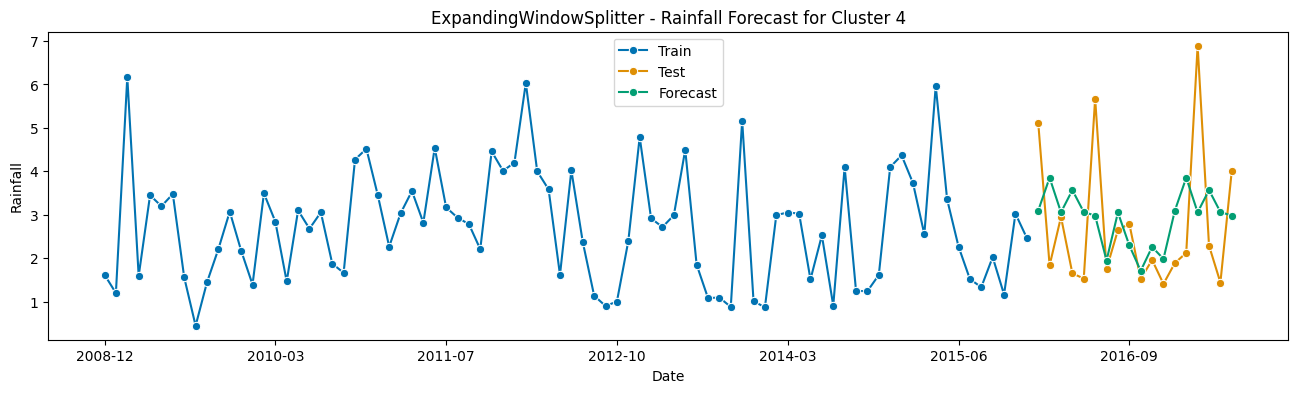

In [4]:
### loop over all clusters

# Load data
df = pd.read_csv("..\..\Data\weatherAUS_Max_final.csv", parse_dates=[0], index_col=[0])

# Initialize dictionary to store predictions for each cluster
predictions = {}

# Iterate over each cluster
for cluster in range(5):
    # Filter data for the current cluster
    rain = df[df['Cluster'] == cluster][['Cluster', 'Date', 'Rainfall']]
    mult = df.drop(['Location'], axis = 1)

    # Prepare multivariate data
    mult_cluster = mult[mult['Cluster']==cluster]
    mult_cluster['year_month'] = pd.to_datetime(mult_cluster['Date']).dt.strftime('%Y-%m')
    mult_cluster = mult_cluster.drop(['Cluster', 'Date'], axis = 1)
    mult_cluster_mean = mult_cluster.groupby(['year_month'], as_index=True).mean()
    mult_cluster_mean = mult_cluster_mean.reset_index()
    mult_cluster_mean['year_month'] = pd.PeriodIndex(mult_cluster_mean['year_month'], freq = 'M')
    mult_cluster_mean = mult_cluster_mean.set_index('year_month')
    mult_cluster_mean_train = mult_cluster_mean[mult_cluster_mean.index.year<2016]
    mult_cluster_mean_test = mult_cluster_mean[mult_cluster_mean.index.year>=2016]
    
    # Prepare endogenous data
    rain['year_month'] = pd.to_datetime(rain['Date']).dt.strftime('%Y-%m')
    rain_df = rain.drop(['Cluster', 'Date'], axis=1)
    rain_mean = rain_df.groupby(['year_month'], as_index=True).mean()
    rain_mean = rain_mean.reset_index()
    rain_mean['year_month'] = pd.PeriodIndex(rain_mean['year_month'], freq='M')
    rain_mean = rain_mean.set_index('year_month')
    rain_mean_train = rain_mean[rain_mean.index.year < 2016]
    rain_mean_test = rain_mean[rain_mean.index.year >= 2016]

    # Initialize and fit multivariate forecaster
    cv = ExpandingWindowSplitter(fh=fh)
    forecaster_mult = NaiveForecaster(sp=12)
    param_grid = {"strategy" : ["last", "mean", "drift"]}
    gscv = ForecastingGridSearchCV(
            forecaster=forecaster_mult,
            param_grid=param_grid,
            cv=cv)
    gscv.fit(mult_cluster_mean_train)

    # Define forecast horizon
    fh = np.arange(1, 19)

    # Make predictions
    mult_cluster_mean_pred = gscv.predict(fh)

    # Store predictions
    predictions[cluster] = mult_cluster_mean_pred

    # Plot forecast
    plt.figure(figsize=(10, 6))
    plot_series(rain_mean_train, rain_mean_test, mult_cluster_mean_pred['Rainfall'], labels=['Train', 'Test', 'Forecast'])
    plt.title(f"ExpandingWindowSplitter - Rainfall Forecast for Cluster {cluster}")
    plt.xlabel("Date")
    plt.ylabel("Rainfall")
    plt.legend()
    plt.show()


## AutoARIMA 

C:\Users\Maximilian Holdt\AppData\Local\Temp\ipykernel_7916\714971456.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("..\..\Data\weatherAUS_Max_final.csv", parse_dates=[0], index_col=[0])
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated 

<Figure size 1000x600 with 0 Axes>

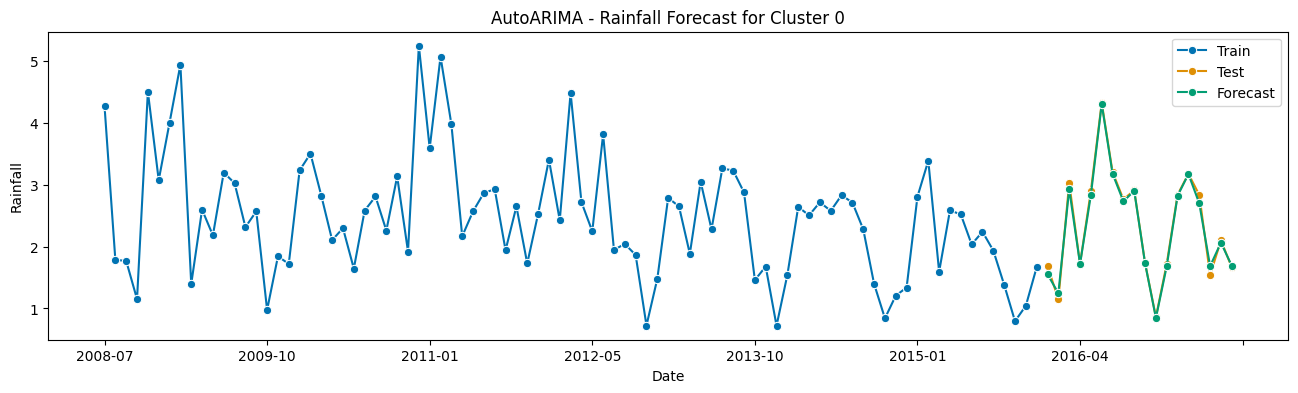

c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1898: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1905: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\skt

<Figure size 1000x600 with 0 Axes>

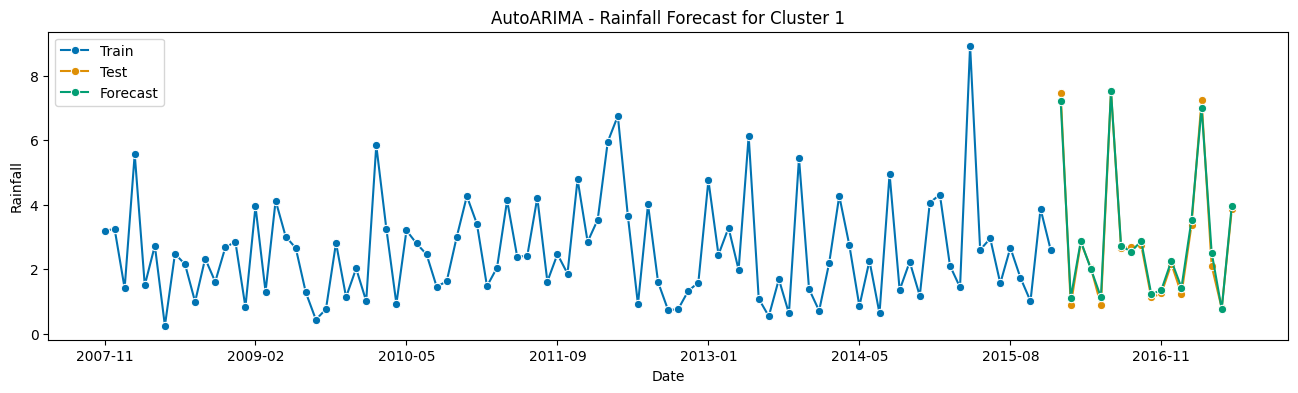

c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
c:\U

<Figure size 1000x600 with 0 Axes>

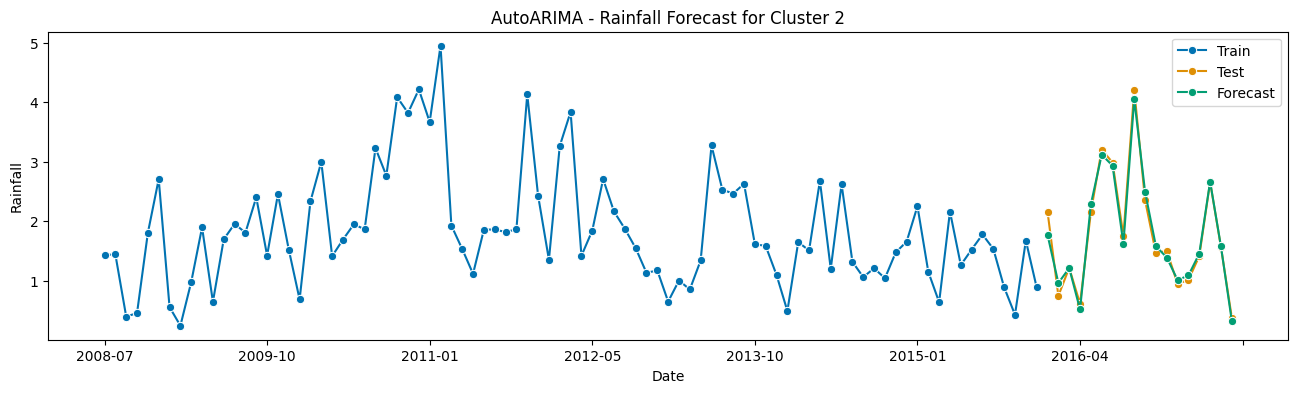

c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
c:\U

<Figure size 1000x600 with 0 Axes>

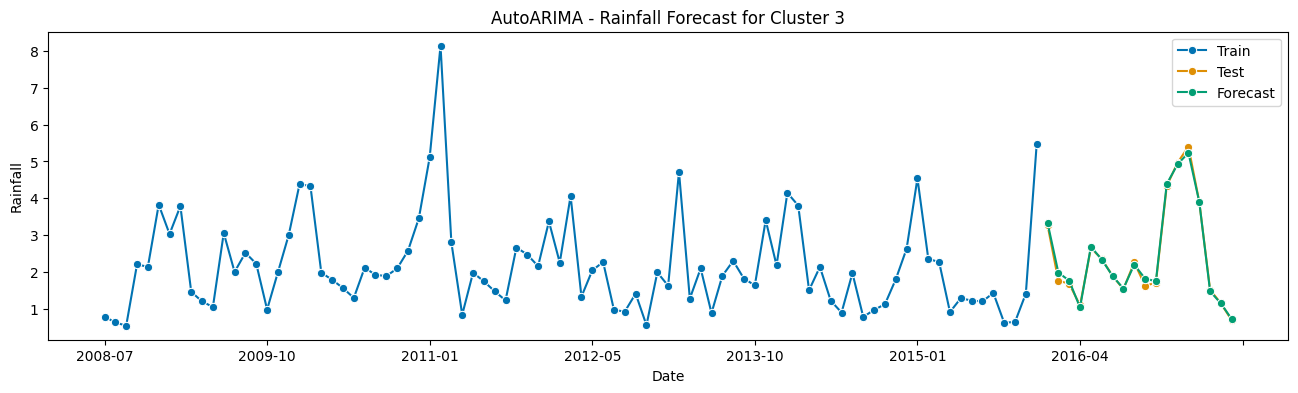

c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
c:\Users\Maximilian Holdt\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\forecasting\base\_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
c:\U

<Figure size 1000x600 with 0 Axes>

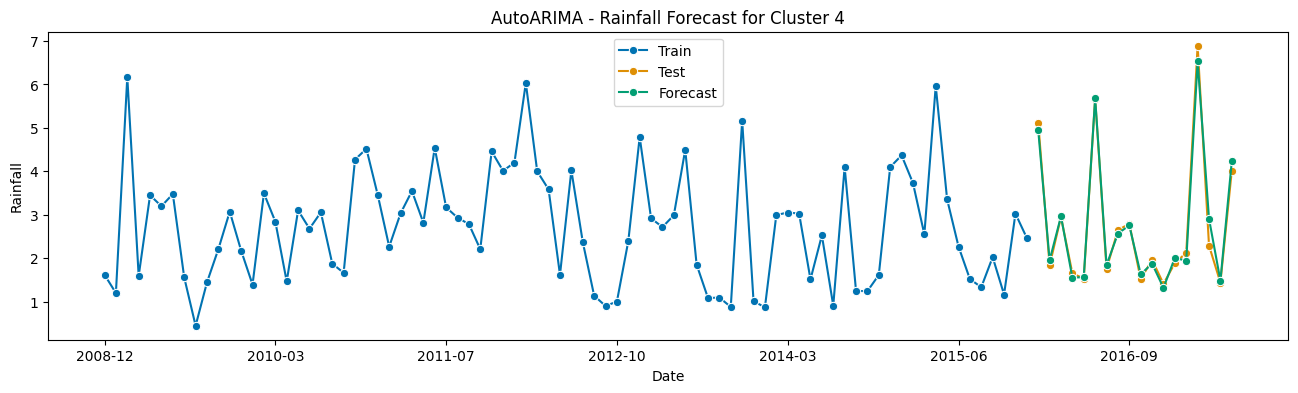

In [5]:
### loop over all clusters

# Load data
df = pd.read_csv("..\..\Data\weatherAUS_Max_final.csv", parse_dates=[0], index_col=[0])

# Initialize dictionary to store predictions for each cluster
predictions = {}

# Iterate over each cluster
for cluster in range(5):
    # Filter endogenous data for the current cluster
    rain = df[df['Cluster'] == cluster][['Cluster', 'Date', 'Rainfall']]
    
    # Prepare endogenous data
    rain['year_month'] = pd.to_datetime(rain['Date']).dt.strftime('%Y-%m')
    rain_df = rain.drop(['Cluster', 'Date'], axis=1)
    rain_mean = rain_df.groupby(['year_month'], as_index=True).mean()
    rain_mean = rain_mean.reset_index()
    rain_mean['year_month'] = pd.PeriodIndex(rain_mean['year_month'], freq='M')
    rain_mean = rain_mean.set_index('year_month')
    rain_mean_train = rain_mean[rain_mean.index.year < 2016]
    rain_mean_test = rain_mean[rain_mean.index.year >= 2016]

    # Prepare exogenous data
    feat = df[df['Cluster'] == cluster].drop(['Rainfall', 'Location'], axis=1)
    feat['year_month'] = pd.to_datetime(feat['Date']).dt.strftime('%Y-%m')
    feat_df = feat.drop(['Cluster', 'Date'], axis=1)
    feat_mean = feat_df.groupby(['year_month'], as_index=True).mean()
    feat_mean = feat_mean.reset_index()
    feat_mean['year_month'] = pd.PeriodIndex(feat_mean['year_month'], freq='M')
    feat_mean = feat_mean.set_index('year_month')
    feat_mean_train = feat_mean[rain_mean.index.year < 2016]
    feat_mean_test = feat_mean[rain_mean.index.year >= 2016]

    # Initialize and fit AutoARIMA forecaster
    forecaster_ex = AutoARIMA(sp=12, suppress_warnings=True)
    forecaster_ex.fit(rain_mean_train, X=feat_mean_train)

    # Define forecast horizon
    fh = np.arange(1, 19)

    # Make predictions
    rain_pred_ex = forecaster_ex.predict(fh, X=feat_mean_test)

    # Store predictions
    predictions[cluster] = rain_pred_ex

    # Plot forecast
    plt.figure(figsize=(10, 6))
    plot_series(rain_mean_train, rain_mean_test, rain_pred_ex, labels=['Train', 'Test', 'Forecast'])
    plt.title(f"AutoARIMA - Rainfall Forecast for Cluster {cluster}")
    plt.xlabel("Date")
    plt.ylabel("Rainfall")
    plt.legend()
    plt.show()